In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('Data/Real-Data/Real_Combine.csv')

In [4]:
data.dropna(inplace=True)

In [6]:
data.head()

,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
0,7.4,9.8,4.8,1017.6,93.0,0.5,4.3,9.4,219.720833
1,7.8,12.7,4.4,1018.5,87.0,0.6,4.4,11.1,182.187500
2,6.7,13.4,2.4,1019.4,82.0,0.6,4.8,11.1,154.037500
3,8.6,15.5,3.3,1018.7,72.0,0.8,8.1,20.6,223.208333
4,12.4,20.9,4.4,1017.3,61.0,1.3,8.7,22.2,200.645833


In [8]:
x=data.drop('PM 2.5', axis=1)
y=data['PM 2.5']

In [9]:
from sklearn.model_selection import train_test_split
xtr,xte,ytr,yte= train_test_split(x,y,test_size=0.3)

In [10]:
from sklearn.neighbors import KNeighborsRegressor

In [11]:
knn=KNeighborsRegressor()
knn.fit(xtr,ytr)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=5, p=2,
          weights='uniform')

In [12]:
# R^2 on training data
knn.score(xtr,ytr)

0.71365088694977

In [13]:
# R^2 on testing data
knn.score(xte,yte)

0.5168519578954838

In [17]:
ypred=knn.predict(xte)

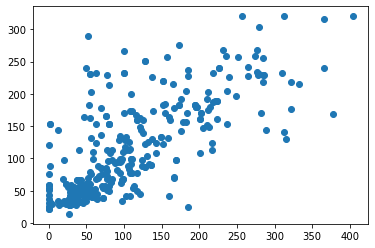

In [18]:
plt.scatter(yte,ypred)

In [14]:
from sklearn.model_selection import cross_val_score
crossscore= cross_val_score(knn,x,y,cv=5)

In [15]:
crossscore.mean()

0.4315907907186956

# Hyperparameter Tuning

In [22]:
accuracy_rate=[]

for i in range(1,40):
    knn=KNeighborsRegressor(n_neighbors=i)
    crscore=cross_val_score(knn,x,y,cv=10,scoring='neg_mean_squared_error')
    accuracy_rate.append(crscore.mean())

In [23]:
accuracy_rate

[-3313.1422505508062,
 -2899.0314433509407,
 -3284.5243665217095,
 -3317.279988207386,
 -3335.442210407435,
 -3400.904747138454,
 -3469.9207164183877,
 -3417.0133615067652,
 -3416.7957560673376,
 -3454.1987626354485,
 -3458.561967648785,
 -3506.0418919791628,
 -3526.2341867771916,
 -3543.266012789109,
 -3543.9452857545575,
 -3536.191746081263,
 -3520.8407733401377,
 -3498.542714344937,
 -3503.7950317914933,
 -3495.9653877503465,
 -3497.998427901154,
 -3490.5630773743674,
 -3482.5177500963487,
 -3495.805531611562,
 -3509.4153978437207,
 -3488.5900860084703,
 -3500.045820751018,
 -3498.5524311206586,
 -3503.7679530398104,
 -3519.3080111715744,
 -3522.5488401980388,
 -3541.866642010783,
 -3547.557970469113,
 -3553.8470442853154,
 -3563.6683475537384,
 -3556.2286919807752,
 -3555.1569008322417,
 -3561.2943599939667,
 -3568.9597845299454]

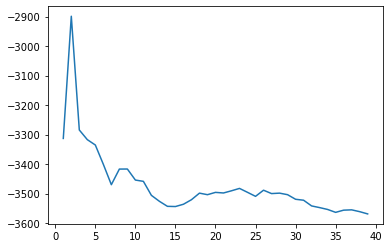

In [24]:
plt.plot(range(1,40),accuracy_rate)

In [25]:
knn=KNeighborsRegressor(n_neighbors=1)
knn.fit(xtr,ytr)
newpred=knn.predict(xte)

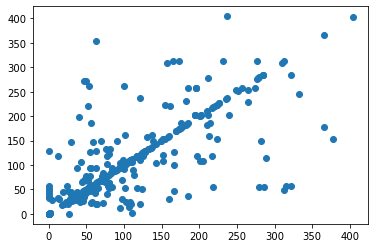

In [26]:
plt.scatter(yte,newpred)

In [27]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(yte, newpred))
print('MSE:', metrics.mean_squared_error(yte, newpred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(yte, newpred)))

MAE: 30.58669969512195
MSE: 3868.4030519033704
RMSE: 62.19648745631356
